<a href="https://colab.research.google.com/github/Kevincancino26/mis-notebook-de-estudio-/blob/main/IA_aumentada_previsi%C3%B3n_de_atraso_de_vuelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='skayblue'> Proyecto

utilizaremos datos de vuelo de un areopuerto esto lo que ahce es generar costos para las empresas y los pasajeros, este proyecto es para prever los atrasos en los vuelos y se puede optimizar las operaciones aereo portuaria, y tengan una mejora en los procesos y costos operativos

el problema: consiste en tratar de tener una prevision del atraso de los vuelos, para optizar los procesos operativos de los vuelos, nos enfocaremso en desarrollar un modelo para prevenir los atrasos en el mejot tiempo posible, es decir tener un margen de tiempo en un periodo para determinar si el vuelo saldra en ese horario y mejorando la experiencia del usuario y reduciendo costos de la aelorinia

Bibliotecas a usar

En este curso, vamos a aprender cómo construir un modelo de regresión para predecir los retrasos en vuelos. Para ello, utilizaremos las bibliotecas Pandas, NumPy, scikit-learn, Seaborn y Yellowbrick en las siguientes versiones:

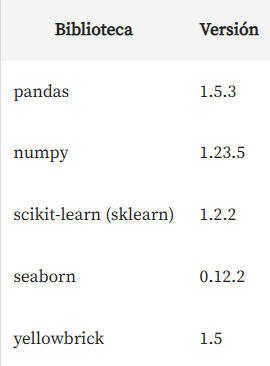

El código a continuación imprime las versiones de las bibliotecas:



```
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')
```




En este archivo CSV, encontrarás el material con los datos que vamos a trabajar durante el curso.
https://github.com/Kevincancino26/mis-notebook-de-estudio-/blob/main/IA_aumentada_previsi%C3%B3n_de_atraso_de_vuelo/flights.csv

#<font color='skayblue'> Explorando los datos

In [16]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2


In [3]:
df_vuelos=pd.read_csv('/content/flights.csv')

In [6]:
df_vuelos.shape

(71175, 11)

In [8]:
#delay esta es minutos y segundos
round(.88*60)

53

In [4]:
df_vuelos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [5]:
df_vuelos.info()#metadatos(la infromacion de los datos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [9]:
df_vuelos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


Al revsar los datos descriptivos podemos darnos una idea de la distribucion y los tiempos de retraso que tenemos en nuestros vuelos con la varibale respuesta, viendo que tenemos que el 25% de mis vuelos salen hasta 4 minutos antes, y que el maximo de mis vuelos salen hasta 1 hora y 25 minutos tarde

In [11]:
df_vuelos.describe(include='object')#nos da la estadistica descriptiva de las variables gategoricas

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


podemos visualisar el conjunto de datos categoricos, donde vemos la cantidad de valores, los datos de cada una de las columnas y el dato que mas se repite con su frecuencia de este, por ejemplo: la aerolinea se repite el BZ con una frecuencia de 47.598

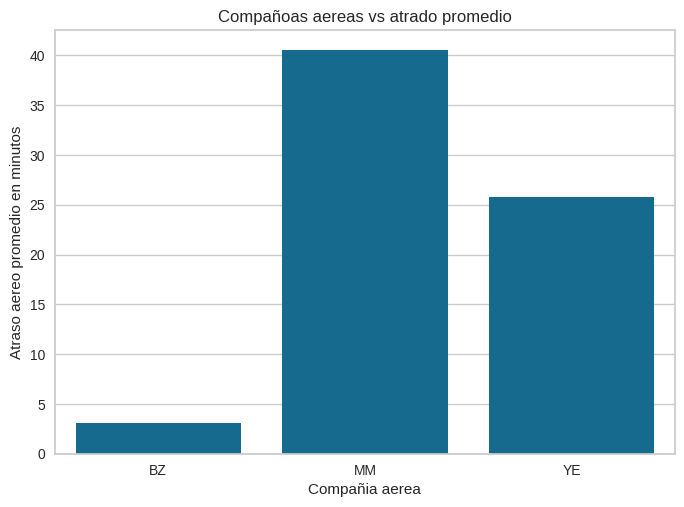

In [21]:
print('\n')
avg_daley=df_vuelos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_daley)
plt.title('Compañoas aereas vs atrado promedio')
plt.xlabel('Compañia aerea')
plt.ylabel('Atraso aereo promedio en minutos')
plt.show()
print('\n')


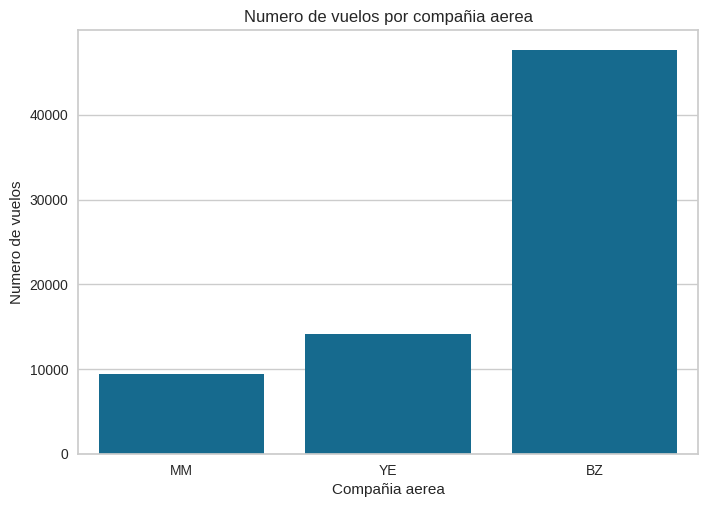

In [22]:
#vamos a crear el numero de vuelos por comañia aeria
sns.countplot(df_vuelos,x='airline')
plt.title('Numero de vuelos por compañia aerea')
plt.xlabel('Compañia aerea')
plt.ylabel('Numero de vuelos')
plt.show()

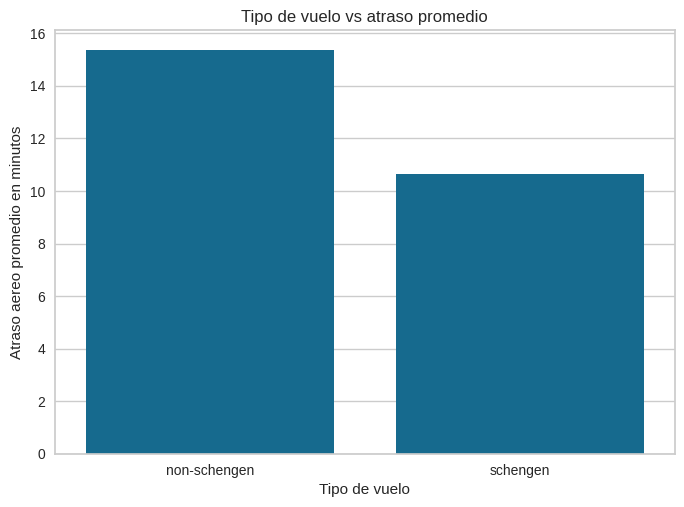

In [27]:
#cantidad de atraso promedio si es espacio schangen o no
avg_daley=df_vuelos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_daley)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso aereo promedio en minutos')
plt.show()


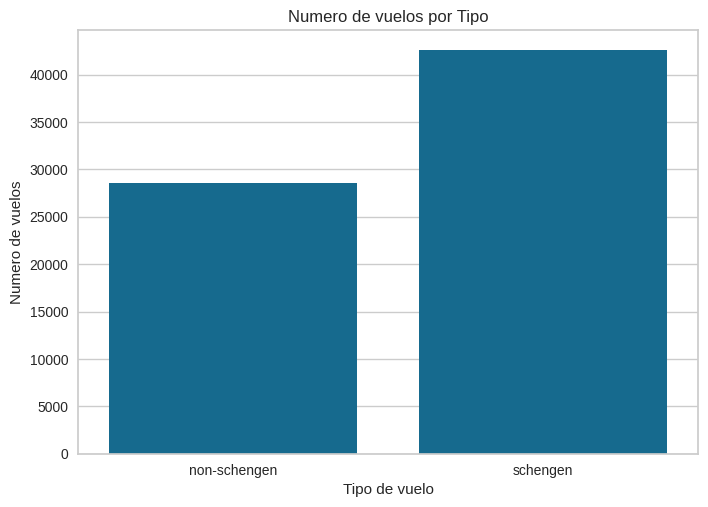

In [26]:
print('\n')


sns.countplot(df_vuelos,x='schengen')
plt.title('Numero de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Numero de vuelos')
plt.show()

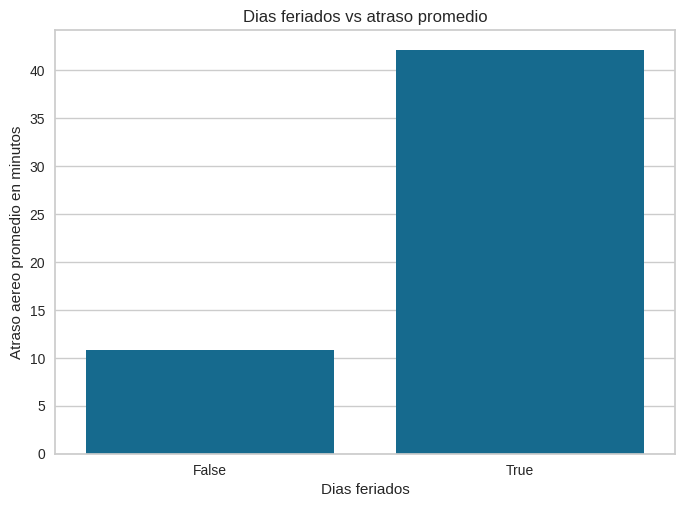

In [28]:
#atrasos sis son dias feriados o no
avg_daley=df_vuelos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_daley)
plt.title('Dias feriados vs atraso promedio')
plt.xlabel('Dias feriados')
plt.ylabel('Atraso aereo promedio en minutos')
plt.show()

In [30]:
order=df_vuelos['aircraft_type'].value_counts().index
order

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

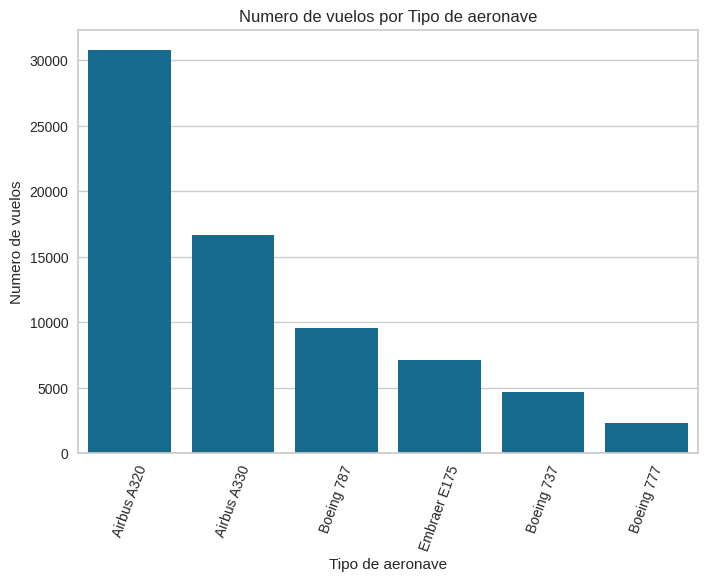

In [32]:
#cantidad de aeronaves por aeropuerto
order=df_vuelos['aircraft_type'].value_counts().index
sns.countplot(df_vuelos,x='aircraft_type',order=order)
plt.title('Numero de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Numero de vuelos')
plt.show()

con esto vemos como esta el comportamiento de nuestros datos con respecto a la variable respuesta asi como cantidades y retrasos